<a href="https://colab.research.google.com/github/leojkn/Projeto_leonardo/blob/main/Trabalho_2_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install pyECLAT

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pyECLAT import ECLAT
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
caminho_do_arquivo = '/content/drive/My Drive/amazon.csv'
df = pd.read_csv(caminho_do_arquivo, encoding='ISO-8859-1')
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [ ]:
valores_unicos = df['state'].unique()

# Para mostrar cada valor único
for valor in valores_unicos:
    print(valor)

Acre
Alagoas
Amapa
Amazonas
Bahia
Ceara
Distrito Federal
Espirito Santo
Goias
Maranhao
Mato Grosso
Minas Gerais
Pará
Paraiba
Pernambuco
Piau
Rio
Rondonia
Roraima
Santa Catarina
Sao Paulo
Sergipe
Tocantins


In [ ]:
def estado_para_regiao(estado):
    regioes = {
        'Norte': ['Acre', 'Amapa', 'Amazonas', 'Pará', 'Rondonia', 'Roraima', 'Tocantins'],
        'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraiba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
        'Centro-Oeste': ['Goias', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'],
        'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'Sao Paulo'],
        'Sul': ['Parana', 'Rio Grande do Sul', 'Santa Catarina']
    }
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return None



In [ ]:
# Aplicando a função à coluna 'State' para criar a nova coluna 'Region'
df['Region'] = df['state'].apply(estado_para_regiao)

In [ ]:
df.head()


,year,state,month,number,date,Region
0,1998,Acre,Janeiro,0.0,1998-01-01,Norte
1,1999,Acre,Janeiro,0.0,1999-01-01,Norte
2,2000,Acre,Janeiro,0.0,2000-01-01,Norte
3,2001,Acre,Janeiro,0.0,2001-01-01,Norte
4,2002,Acre,Janeiro,0.0,2002-01-01,Norte


In [ ]:
# Criando uma nova coluna que indica se o número de queimadas é significativo
df['SignificantFires'] = df['number'].apply(lambda x: 'HighFires' if x > 100 else 'LowFires')

In [ ]:
df.head()

,year,state,month,number,date,Region,SignificantFires
0,1998,Acre,Janeiro,0.0,1998-01-01,Norte,LowFires
1,1999,Acre,Janeiro,0.0,1999-01-01,Norte,LowFires
2,2000,Acre,Janeiro,0.0,2000-01-01,Norte,LowFires
3,2001,Acre,Janeiro,0.0,2001-01-01,Norte,LowFires
4,2002,Acre,Janeiro,0.0,2002-01-01,Norte,LowFires


In [ ]:
# Preparando os dados para ECLAT
# Cada transação é uma lista de itens (Estado, Mês, SignificantFires)
transactions = df.apply(lambda row: [row['Region'], row['month'], row['SignificantFires']], axis=1).tolist()

In [ ]:
transactions

In [ ]:
# Supondo que transactions seja uma lista de listas, onde cada sublista é uma transação
transactions = df['transaction'].apply(lambda x: x.split('_')).tolist()

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Transformando as transações para o formato adequado
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Cada transação é uma lista de itens (Estado, Mês, SignificantFires)
transactions = df.apply(lambda row: [row['state'], row['month'], row['SignificantFires']], axis=1).tolist()

In [ ]:
# Suponha que 'transactions' seja sua lista de listas, onde cada sublista é uma transação
df_transactions = pd.DataFrame(transactions)


In [ ]:
# Agora df_transactions é um DataFrame que pode ser passado para ECLAT
eclat_instance = ECLAT(data=df_transactions, verbose=True)

100%|██████████| 37/37 [00:00<00:00, 1764.56it/s]


In [ ]:
# Aplicando ECLAT
eclat_instance = ECLAT(data=df_transactions, verbose=True)
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.01, min_combination=1, max_combination=3)

100%|██████████| 37/37 [00:00<00:00, 2664.10it/s]


Combination 1 by 1


37it [00:00, 217.39it/s]


Combination 2 by 2


666it [00:02, 297.22it/s]


Combination 3 by 3


7770it [00:26, 293.98it/s]


In [ ]:
# Exibindo os resultados
print(get_ECLAT_supports)

{'Pernambuco': 0.03703129841958475, 'Mato Grosso': 0.0740625968391695, 'Santa Catarina': 0.03703129841958475, 'Amapa': 0.03703129841958475, 'Goias': 0.03703129841958475, 'Rondonia': 0.03703129841958475, 'Junho': 0.08366904245429191, 'LowFires': 0.730399752091726, 'Bahia': 0.03703129841958475, 'Roraima': 0.03703129841958475, 'Julho': 0.08366904245429191, 'Sergipe': 0.03703129841958475, 'Outubro': 0.08366904245429191, 'Maranhao': 0.03703129841958475, 'Paraiba': 0.0740625968391695, 'HighFires': 0.2696002479082739, 'Espirito Santo': 0.03703129841958475, 'Fevereiro': 0.08366904245429191, 'Dezembro': 0.07948559033157732, 'Março': 0.08366904245429191, 'Novembro': 0.08366904245429191, 'Rio': 0.11109389525875427, 'Amazonas': 0.03703129841958475, 'Acre': 0.03703129841958475, 'Sao Paulo': 0.03703129841958475, 'Janeiro': 0.08382398512550357, 'Setembro': 0.08366904245429191, 'Abril': 0.08366904245429191, 'Minas Gerais': 0.03703129841958475, 'Alagoas': 0.03718624109079641, 'Tocantins': 0.03703129841

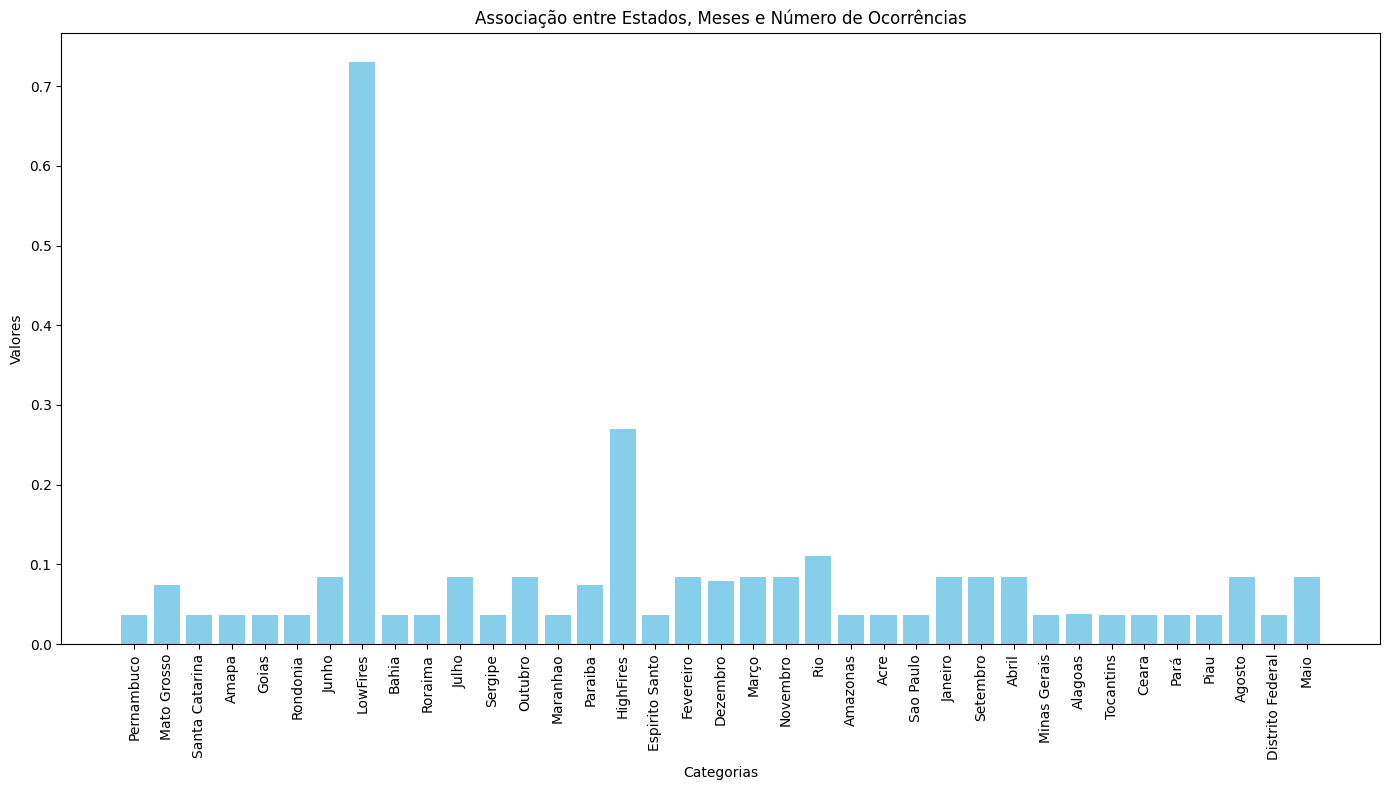

In [ ]:
import matplotlib.pyplot as plt

# Dados do estudo
categories = [
    'Pernambuco', 'Mato Grosso', 'Santa Catarina', 'Amapa', 'Goias', 'Rondonia', 'Junho', 'LowFires', 'Bahia', 'Roraima',
    'Julho', 'Sergipe', 'Outubro', 'Maranhao', 'Paraiba', 'HighFires', 'Espirito Santo', 'Fevereiro', 'Dezembro', 'Março',
    'Novembro', 'Rio', 'Amazonas', 'Acre', 'Sao Paulo', 'Janeiro', 'Setembro', 'Abril', 'Minas Gerais', 'Alagoas',
    'Tocantins', 'Ceara', 'Pará', 'Piau', 'Agosto', 'Distrito Federal', 'Maio'
]
values = [
    0.03703129841958475, 0.0740625968391695, 0.03703129841958475, 0.03703129841958475, 0.03703129841958475,
    0.03703129841958475, 0.08366904245429191, 0.730399752091726, 0.03703129841958475, 0.03703129841958475,
    0.08366904245429191, 0.03703129841958475, 0.08366904245429191, 0.03703129841958475, 0.0740625968391695,
    0.2696002479082739, 0.03703129841958475, 0.08366904245429191, 0.07948559033157732, 0.08366904245429191,
    0.08366904245429191, 0.11109389525875427, 0.03703129841958475, 0.03703129841958475, 0.03703129841958475,
    0.08382398512550357, 0.08366904245429191, 0.08366904245429191, 0.03703129841958475, 0.03718624109079641,
    0.03703129841958475, 0.03703129841958475, 0.03703129841958475, 0.03703129841958475, 0.08366904245429191,
    0.03703129841958475, 0.08366904245429191
]

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Associação entre Estados, Meses e Número de Ocorrências')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta automaticamente os subplots para dar espaço aos rótulos

# Mostrando o gráfico
plt.show()